[2.9701224883713769e-13, 1.9229502880712392e-13, 1.7620118624049064e-13, 1.661112058025741e-13, 1.6003523760494437e-13, 1.5606657102641864e-13, 1.5344064526450189e-13, 1.5176410130909735e-13, 1.508273724880149e-13, 1.5052577361941047e-13, 1.5082737248801431e-13, 1.5176410130909621e-13, 1.5344064526450216e-13, 1.5606657102641665e-13, 1.6003523760494417e-13, 1.6611120580257438e-13, 1.7620118624049122e-13, 1.9229502880712361e-13, 2.9701224883713688e-13, 1.9229502880712404e-13, 9.5065558764140021e-14, 8.4686913555814604e-14, 7.8133201112693679e-14, 7.4496635565494364e-14, 7.2218164607242263e-14, 7.0753905098860817e-14, 6.9836833224019109e-14, 6.933048272693619e-14, 6.9168375895237289e-14, 6.9330482726937616e-14, 6.9836833224018604e-14, 7.0753905098861234e-14, 7.2218164607242112e-14, 7.4496635565495071e-14, 7.813320111269296e-14, 8.4686913555813241e-14, 9.5065558764140589e-14, 1.9229502880712361e-13, 1.7620118624049064e-13, 8.4686913555814958e-14, 7.3949718794584669e-14, 6.7381581052425384e

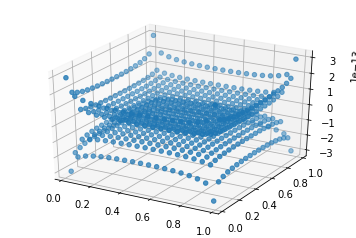

Capacitance of parallel plates
2.89018296232e-11
Difference
2.00518296232e-11


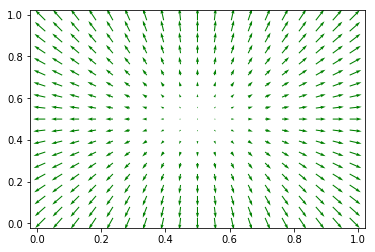

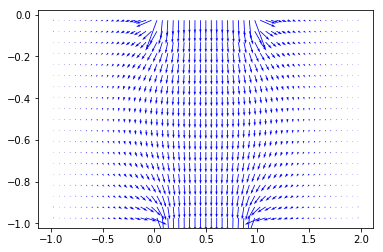

In [55]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import integrate
from numpy.linalg import inv
from mpl_toolkits.mplot3d import Axes3D
#Upper plate at +0.5 volts
#Lower plate at -0.5 volts
b=1   #square plate of side 1m
n=20 #Discretization order
a=b/(n-1)
k1=4*3.14159265*8.85e-12
d=1  #distance between plates = 1milimetre
x=[]
y=[]
m=[]                 #m holds positions of charges
p=[]
xx=[]
yy=[]
for i in range(0,n-1):
    x.append(((2*i+1)*a)/2)
    y.append(((2*i+1)*a)/2)
    
for i in range(0,n-1):
    x.append(((2*i+1)*a)/2)
    y.append(((2*i+1)*a)/2)
    
for i in range(0,n-1):
    for j in range(0,n-1):
        m.append([x[i],y[j]])

for i in range(0,n-1):
    for j in range(0,n-1):
        m.append([x[i+n-1],y[j+n-1]])

#print(m)

v=[]
for i in range(0,2*((n-1)**2)):
    f1=lambda y,x:1/np.sqrt((x-m[i][0])**2+(y-m[i][1])**2)
    f2=lambda y,x:1/np.sqrt((x-m[i][0])**2+(y-m[i][1])**2+d**2)
    for k in range(0,2*((n-1)**2)):
        if(k!=i and k<(n-1)**2 and i<(n-1)**2):
            c=integrate.dblquad(f1,m[k][0]-(a/2),m[k][0]+(a/2),lambda x:m[k][1]-(a/2),lambda x:m[k][1]+(a/2))
            v.append(c[0])
        if(k==i and k<(n-1)**2 and i<(n-1)**2):
            v.append(4*a*np.log(1+np.sqrt(2)))
        if(k>=(n-1)**2 and i<(n-1)**2):
            c=integrate.dblquad(f2,m[k][0]-(a/2),m[k][0]+(a/2),lambda x:m[k][1]-(a/2),lambda x:m[k][1]+(a/2))
            v.append(c[0])
        if(i>=(n-1)**2 and k<(n-1)**2):
            c=integrate.dblquad(f2,m[k][0]-(a/2),m[k][0]+(a/2),lambda x:m[k][1]-(a/2),lambda x:m[k][1]+(a/2))
            v.append(c[0])
        if(i>=(n-1)**2 and k>=(n-1)**2 and k!=i):
            c=integrate.dblquad(f1,m[k][0]-(a/2),m[k][0]+(a/2),lambda x:m[k][1]-(a/2),lambda x:m[k][1]+(a/2))
            v.append(c[0])
        if(i>=(n-1)**2 and k>=(n-1)**2 and k==i):
            v.append(4*a*np.log(1+np.sqrt(2)))
        
#print(v)
z=np.empty(2*((n-1)**2))
z.fill(k1/2)
for h in range(((n-1)**2),2*((n-1)**2)):
    z[h]=-k1/2
#print(z)
v1=np.reshape(v,(-1,2*((n-1)**2)))
#print(v1)
vinv=inv(v1)
#print(vinv)
sigma=np.matmul(vinv,z)
#print("Charge densities")
#print(sigma)
#print("Charges on each square")
#print(sigma*a*a)
res=sigma*a*a
res2=[]
x2=[]
y2=[]
for i in range(0,2*((n-1)**2)):
    res2.append(res[i])
for i in range(0,2*((n-1)**2)):
    x2.append(m[i][0])
    y2.append(m[i][1])
for i in range(0,(n-1)**2):
    xx.append(m[i][0])
    yy.append(m[i][1])
#print(x2)
#print(y2)
print(res2)                              #res2 holds charges
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x2,y2,res2)
plt.show()
print("Capacitance of parallel plates")
C=0
for i in range(0,(n-1)**2):
    C=C+res2[i]
print(C)
print("Difference")
print(C-(8.85e-12)/d)
z=1
def electric1(q,r,x,y):
    deno=k1*(((x-r[0])**2+(y-r[1])**2+(z**2))**(1.5))
    return q*(x-r[0])/deno,q*(y-r[1])/deno
def electric2(q,r,x,y):
    deno=k1*(((x-r[0])**2+(y-r[1])**2+((z+d)**2))**(1.5))
    return q*(x-r[0])/deno,q*(y-r[1])/deno
Ex=np.zeros((n-1)**2)
Ey=np.zeros((n-1)**2)
i=0
j=0
for i in range(0,((n-1)**2)):
    for j in range(0,((n-1)**2)):
        ex,ey=electric1(res2[j],m[j],xx[i],yy[i])
        Ex[i]+=ex
        Ey[i]+=ey
    for j in range((n-1)**2,2*((n-1)**2)):
        ex,ey=electric2(res2[j],m[j],xx[i],yy[i])
        Ex[i]+=ex
        Ey[i]+=ey
fig = plt.figure()
ax = fig.add_subplot(111)
ax.quiver(xx,yy,Ex,Ey,color='green')
plt.show()

#Electric field in vertical plane at x_coo=2m
z=[]
y=[]
x=[]
p=[]
x_coo=0.5
i=0
for i in range(-(n-1),0):
    y.append(((2*i+1)*a)/2)
for i in range(0,(n-1)):
    z.append(-((2*i+1)*a)/2)
    y.append(((2*i+1)*a)/2)
for i in range((n-1),2*(n-1)):
    y.append(((2*i+1)*a)/2)
for i in range(0,3*(n-1)):
    for j in range(0,(n-1)):
        p.append([y[i],z[j]])
zz=[]
yy=[]
for i in range(0,3*((n-1)**2)):
    yy.append(p[i][0])
    zz.append(p[i][1])
def electric3(q,r,y,z):
    deno=k1*(((x_coo-r[0])**2+(y-r[1])**2+(z**2))**(1.5))
    return q*(y-r[1])/deno,q*z/deno
def electric4(q,r,y,z):
    deno=k1*(((x_coo-r[0])**2+(y-r[1])**2+((z+d)**2))**(1.5))
    return q*(y-r[1])/deno,q*(z+d)/deno
Ey=np.zeros(3*((n-1)**2))
Ez=np.zeros(3*((n-1)**2))
for i in range(0,3*((n-1)**2)):
    for j in range(0,((n-1)**2)):
        ey,ez=electric3(res2[j],m[j],yy[i],zz[i])
        Ey[i]+=ey
        Ez[i]+=ez
    for j in range((n-1)**2,2*((n-1)**2)):
        ey,ez=electric4(res2[j],m[j],yy[i],zz[i])
        Ey[i]+=ey
        Ez[i]+=ez
fig = plt.figure()
ax = fig.add_subplot(111)
ax.quiver(yy,zz,Ey,Ez,color='blue')
plt.show()


[ 0.0144667   0.01461965  0.01474103 ...,  0.01583119  0.01494173
  0.01410741]
[-0.00226002 -0.00279585 -0.00335883 ...,  0.0139721   0.01360745
  0.01324167]


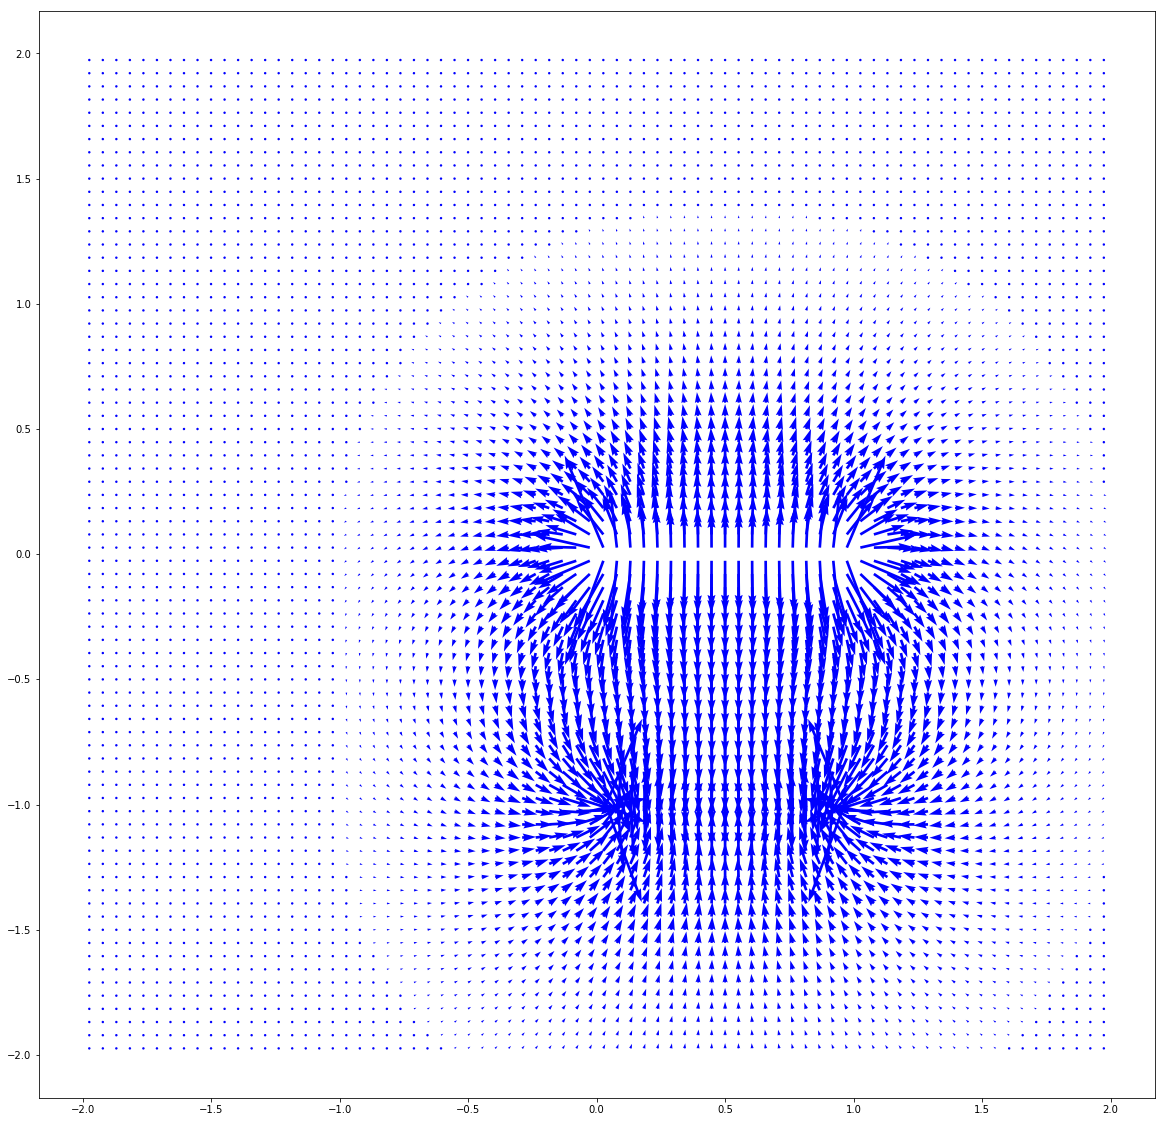

In [57]:
z=[]
y=[]
x=[]
p=[]
x_coo=0.5
for i in range(-2*(n-1),2*(n-1)):
    y.append(((2*i+1)*a)/2)
    z.append(((2*i+1)*a)/2)

for i in range(0,4*(n-1)):
    for j in range(0,4*(n-1)):
        p.append([y[i],z[j]])
zz=[]
yy=[]
for i in range(0,16*((n-1)**2)):
    yy.append(p[i][0])
    zz.append(p[i][1])
def electric3(q,r,y,z):
    deno=k1*(((x_coo-r[0])**2+(y-r[1])**2+(z**2))**(1.5))
    return q*(y-r[1])/deno,q*z/deno
def electric4(q,r,y,z):
    deno=k1*(((x_coo-r[0])**2+(y-r[1])**2+((z+d)**2))**(1.5))
    return q*(y-r[1])/deno,q*(z+d)/deno
Ey=np.zeros(16*((n-1)**2))
Ez=np.zeros(16*((n-1)**2))
for i in range(0,16*((n-1)**2)):
    for j in range(0,((n-1)**2)):
        ey,ez=electric3(res2[j],m[j],yy[i],zz[i])
        Ey[i]+=ey
        Ez[i]+=ez
    for j in range((n-1)**2,2*((n-1)**2)):
        ey,ez=electric4(res2[j],m[j],yy[i],zz[i])
        Ey[i]+=ey
        Ez[i]+=ez
print(Ey)
print(Ez)
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
ax.quiver(yy,zz,Ey,Ez,color='blue')
plt.show()


In [58]:
print(Ey)

[ 0.0144667   0.01461965  0.01474103 ...,  0.01583119  0.01494173
  0.01410741]


Capacitance of parallel plates
2.1412554651e-11
Difference
1.2562554651e-11
Capacitance of parallel plates
2.44594738952e-11
Difference
1.56094738952e-11
Capacitance of parallel plates
2.5905117626e-11
Difference
1.7055117626e-11
Capacitance of parallel plates
2.6705896456e-11
Difference
1.7855896456e-11
Capacitance of parallel plates
2.72191226054e-11
Difference
1.83691226054e-11
Capacitance of parallel plates
2.75760851816e-11
Difference
1.87260851816e-11
Capacitance of parallel plates
2.7838866824e-11
Difference
1.8988866824e-11
Capacitance of parallel plates
2.80404719722e-11
Difference
1.91904719722e-11
Capacitance of parallel plates
2.8200083617e-11
Difference
1.9350083617e-11
Capacitance of parallel plates
2.83296151401e-11
Difference
1.94796151401e-11
Capacitance of parallel plates
2.843685778e-11
Difference
1.958685778e-11
Capacitance of parallel plates
2.85271226435e-11
Difference
1.96771226435e-11
Capacitance of parallel plates
2.86041554764e-11
Difference
1.97541554764e-11


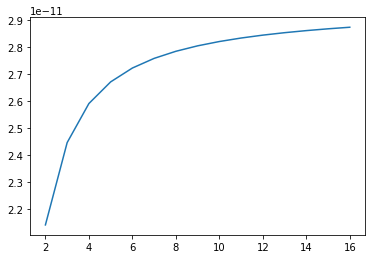

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import integrate
from numpy.linalg import inv
from mpl_toolkits.mplot3d import Axes3D
Cap=[]
Cap2=[]
idx=[]
for e in range(2,17):
    b=1   #square plate of side 1m
    n=e #Discretization order
    a=b/(n-1)
    k1=4*3.14159265*8.85e-12
    d=1  #distance between plates = 1milimetre
    x=[]
    y=[]
    m=[]                 #m holds positions of charges
    p=[]
    xx=[]
    yy=[]
    for i in range(0,n-1):
        x.append(((2*i+1)*a)/2)
        y.append(((2*i+1)*a)/2)

    for i in range(0,n-1):
        x.append(((2*i+1)*a)/2)
        y.append(((2*i+1)*a)/2)

    for i in range(0,n-1):
        for j in range(0,n-1):
            m.append([x[i],y[j]])

    for i in range(0,n-1):
        for j in range(0,n-1):
            m.append([x[i+n-1],y[j+n-1]])

    #print(m)

    v=[]
    for i in range(0,2*((n-1)**2)):
        f1=lambda y,x:1/np.sqrt((x-m[i][0])**2+(y-m[i][1])**2)
        f2=lambda y,x:1/np.sqrt((x-m[i][0])**2+(y-m[i][1])**2+d**2)
        for k in range(0,2*((n-1)**2)):
            if(k!=i and k<(n-1)**2 and i<(n-1)**2):
                c=integrate.dblquad(f1,m[k][0]-(a/2),m[k][0]+(a/2),lambda x:m[k][1]-(a/2),lambda x:m[k][1]+(a/2))
                v.append(c[0])
            if(k==i and k<(n-1)**2 and i<(n-1)**2):
                v.append(4*a*np.log(1+np.sqrt(2)))
            if(k>=(n-1)**2 and i<(n-1)**2):
                c=integrate.dblquad(f2,m[k][0]-(a/2),m[k][0]+(a/2),lambda x:m[k][1]-(a/2),lambda x:m[k][1]+(a/2))
                v.append(c[0])
            if(i>=(n-1)**2 and k<(n-1)**2):
                c=integrate.dblquad(f2,m[k][0]-(a/2),m[k][0]+(a/2),lambda x:m[k][1]-(a/2),lambda x:m[k][1]+(a/2))
                v.append(c[0])
            if(i>=(n-1)**2 and k>=(n-1)**2 and k!=i):
                c=integrate.dblquad(f1,m[k][0]-(a/2),m[k][0]+(a/2),lambda x:m[k][1]-(a/2),lambda x:m[k][1]+(a/2))
                v.append(c[0])
            if(i>=(n-1)**2 and k>=(n-1)**2 and k==i):
                v.append(4*a*np.log(1+np.sqrt(2)))

    #print(v)
    z=np.empty(2*((n-1)**2))
    z.fill(k1/2)
    for h in range(((n-1)**2),2*((n-1)**2)):
        z[h]=-k1/2
    #print(z)
    v1=np.reshape(v,(-1,2*((n-1)**2)))
    #print(v1)
    vinv=inv(v1)
    #print(vinv)
    sigma=np.matmul(vinv,z)
    #print("Charge densities")
    #print(sigma)
    #print("Charges on each square")
    #print(sigma*a*a)
    res=sigma*a*a
    res2=[]
    x2=[]
    y2=[]
    for i in range(0,2*((n-1)**2)):
        res2.append(res[i])
    for i in range(0,2*((n-1)**2)):
        x2.append(m[i][0])
        y2.append(m[i][1])
    for i in range(0,(n-1)**2):
        xx.append(m[i][0])
        yy.append(m[i][1])
    #print(x2)
    #print(y2)
    #print(res2)                              #res2 holds charges
    #fig = plt.figure()
    #ax = fig.add_subplot(111, projection='3d')
    #ax.scatter(x2,y2,res2)
    #plt.show()
    print("Capacitance of parallel plates")
    C=0
    for i in range(0,(n-1)**2):
        C=C+res2[i]
    print(C)
    print("Difference")
    print(C-(8.85e-12)/d)
    Cap.append(C)
    Cap2.append((8.85e-12)/d)
    idx.append(e)
plt.plot(idx,Cap)
plt.show()
    
    
        


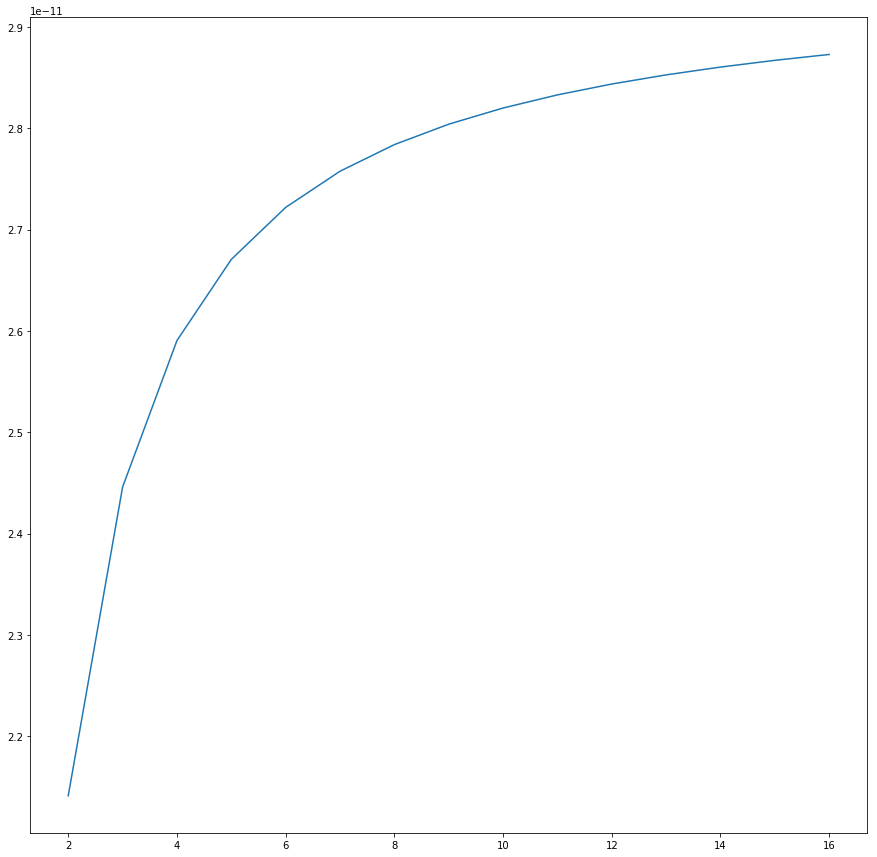

In [8]:

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.plot(idx,Cap)

Capacitance of parallel plates
1.08998071254e-10
Difference
2.04980712536e-11
Capacitance of parallel plates
6.45730033907e-11
Difference
2.03230033907e-11
Capacitance of parallel plates
4.95332115884e-11
Difference
2.00332115884e-11
Capacitance of parallel plates
4.19194152276e-11
Difference
1.97944152276e-11
Capacitance of parallel plates
3.73114282631e-11
Difference
1.96114282631e-11
Capacitance of parallel plates
3.42232430597e-11
Difference
1.94732430597e-11
Capacitance of parallel plates
3.20121821254e-11
Difference
1.93693249825e-11
Capacitance of parallel plates
3.03539401886e-11
Difference
1.92914401886e-11
Capacitance of parallel plates
2.9066712457e-11
Difference
1.92333791237e-11


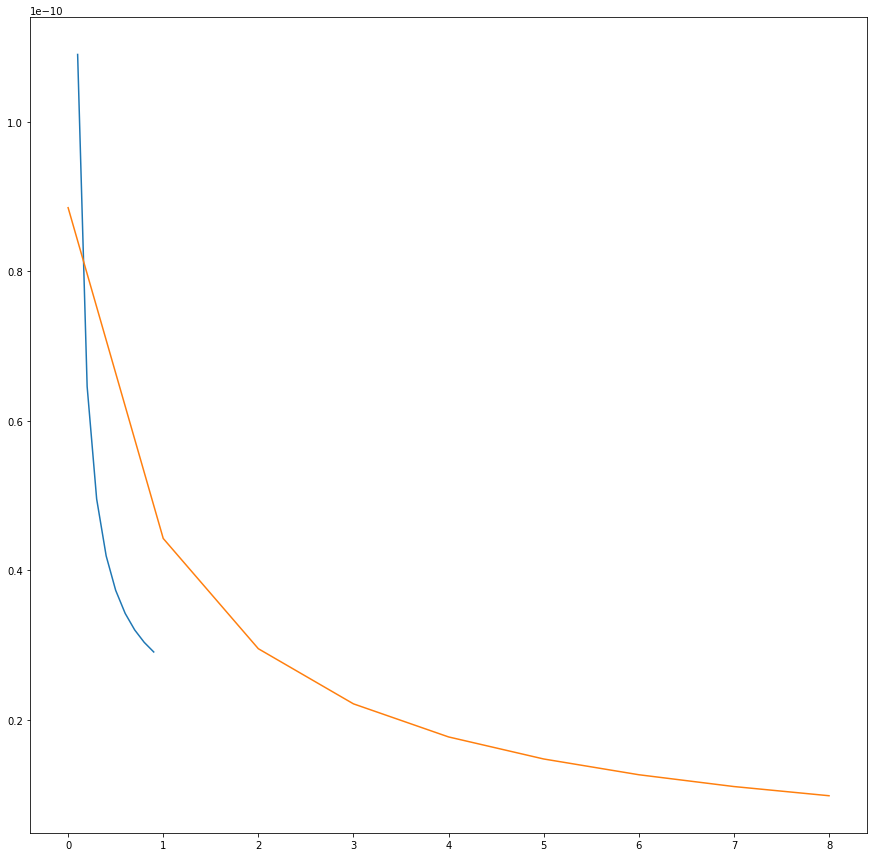

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import integrate
from numpy.linalg import inv
from mpl_toolkits.mplot3d import Axes3D
Cap=[]
Cap2=[]
idx=[]
for f in range(1,10):
    b=1   #square plate of side 1m
    n=9 #Discretization order
    a=b/(n-1)
    k1=4*3.14159265*8.85e-12
    d=f*0.01  #distance between plates = 1milimetre
    x=[]
    y=[]
    m=[]                 #m holds positions of charges
    p=[]
    xx=[]
    yy=[]
    for i in range(0,n-1):
        x.append(((2*i+1)*a)/2)
        y.append(((2*i+1)*a)/2)

    for i in range(0,n-1):
        x.append(((2*i+1)*a)/2)
        y.append(((2*i+1)*a)/2)

    for i in range(0,n-1):
        for j in range(0,n-1):
            m.append([x[i],y[j]])

    for i in range(0,n-1):
        for j in range(0,n-1):
            m.append([x[i+n-1],y[j+n-1]])

    #print(m)

    v=[]
    for i in range(0,2*((n-1)**2)):
        f1=lambda y,x:1/np.sqrt((x-m[i][0])**2+(y-m[i][1])**2)
        f2=lambda y,x:1/np.sqrt((x-m[i][0])**2+(y-m[i][1])**2+d**2)
        for k in range(0,2*((n-1)**2)):
            if(k!=i and k<(n-1)**2 and i<(n-1)**2):
                c=integrate.dblquad(f1,m[k][0]-(a/2),m[k][0]+(a/2),lambda x:m[k][1]-(a/2),lambda x:m[k][1]+(a/2))
                v.append(c[0])
            if(k==i and k<(n-1)**2 and i<(n-1)**2):
                v.append(4*a*np.log(1+np.sqrt(2)))
            if(k>=(n-1)**2 and i<(n-1)**2):
                c=integrate.dblquad(f2,m[k][0]-(a/2),m[k][0]+(a/2),lambda x:m[k][1]-(a/2),lambda x:m[k][1]+(a/2))
                v.append(c[0])
            if(i>=(n-1)**2 and k<(n-1)**2):
                c=integrate.dblquad(f2,m[k][0]-(a/2),m[k][0]+(a/2),lambda x:m[k][1]-(a/2),lambda x:m[k][1]+(a/2))
                v.append(c[0])
            if(i>=(n-1)**2 and k>=(n-1)**2 and k!=i):
                c=integrate.dblquad(f1,m[k][0]-(a/2),m[k][0]+(a/2),lambda x:m[k][1]-(a/2),lambda x:m[k][1]+(a/2))
                v.append(c[0])
            if(i>=(n-1)**2 and k>=(n-1)**2 and k==i):
                v.append(4*a*np.log(1+np.sqrt(2)))

    #print(v)
    z=np.empty(2*((n-1)**2))
    z.fill(k1/2)
    for h in range(((n-1)**2),2*((n-1)**2)):
        z[h]=-k1/2
    #print(z)
    v1=np.reshape(v,(-1,2*((n-1)**2)))
    #print(v1)
    vinv=inv(v1)
    #print(vinv)
    sigma=np.matmul(vinv,z)
    #print("Charge densities")
    #print(sigma)
    #print("Charges on each square")
    #print(sigma*a*a)
    res=sigma*a*a
    res2=[]
    x2=[]
    y2=[]
    for i in range(0,2*((n-1)**2)):
        res2.append(res[i])
    for i in range(0,2*((n-1)**2)):
        x2.append(m[i][0])
        y2.append(m[i][1])
    for i in range(0,(n-1)**2):
        xx.append(m[i][0])
        yy.append(m[i][1])
    #print(x2)
    #print(y2)
    #print(res2)                              #res2 holds charges
    #fig = plt.figure()
    #ax = fig.add_subplot(111, projection='3d')
    #ax.scatter(x2,y2,res2)
    #plt.show()
    print("Capacitance of parallel plates")
    C=0
    for i in range(0,(n-1)**2):
        C=C+res2[i]
    print(C)
    print("Difference")
    print(C-(8.85e-12)/d)
    Cap.append(C)
    idx.append(d)
    Cap2.append((8.85e-12)/d)
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.plot(idx,Cap)
plt.show()
    

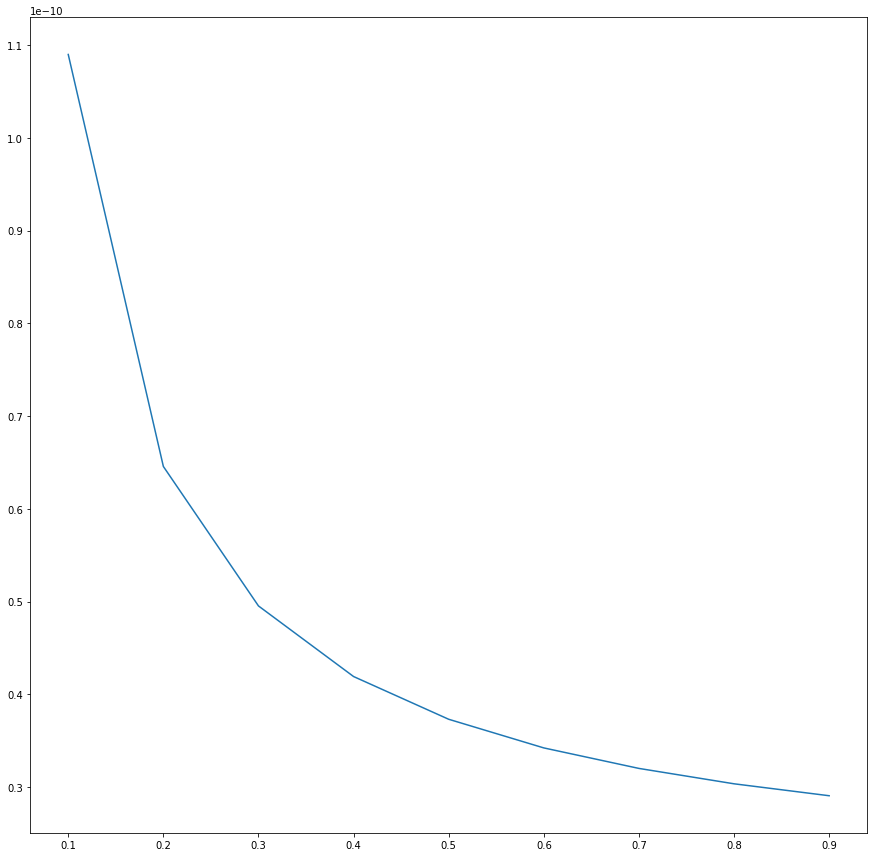

In [14]:

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.plot(idx,Cap)
plt.show()

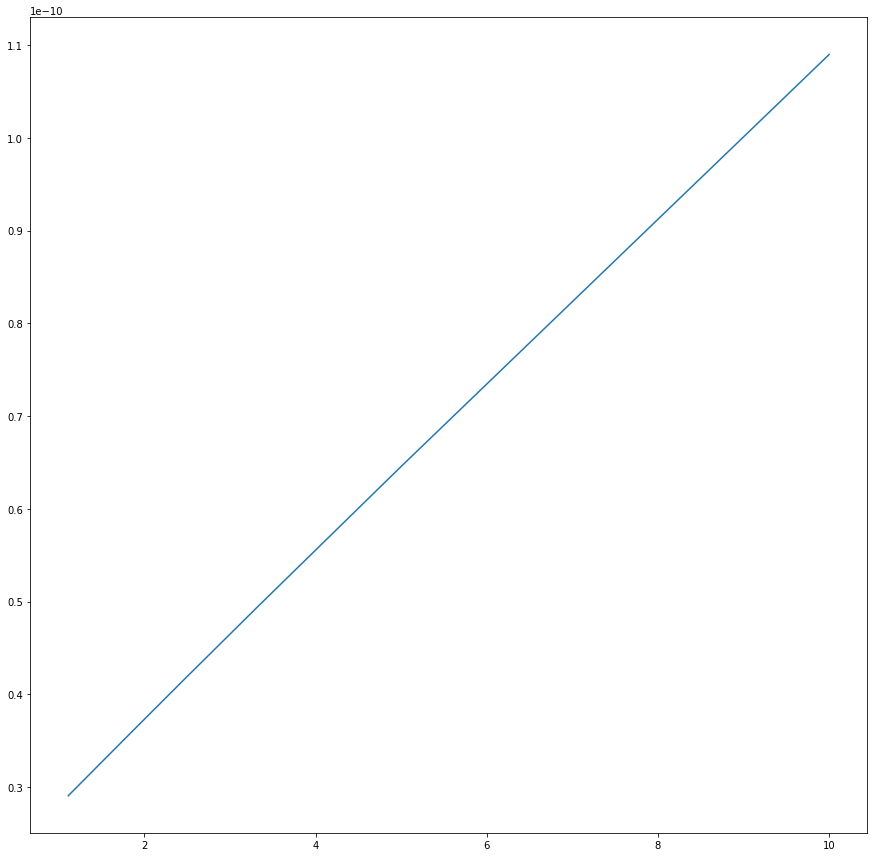

In [25]:
d=[]
for i in range(0,9):
    d.append(1/idx[i])
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.plot(d,Cap)
plt.show()

In [20]:
print(len(idx))

9


[1.8299831426353352e-12, 1.5462885984098051e-12, 1.532224631486512e-12, 1.523213229363449e-12, 1.5209400368375786e-12, 1.5232132293634516e-12, 1.5322246314865112e-12, 1.5462885984098053e-12, 1.829983142635336e-12, 1.5462885984098059e-12, 1.2405090312173809e-12, 1.227026837078931e-12, 1.2177343157642188e-12, 1.2154633925442289e-12, 1.2177343157642197e-12, 1.2270268370789288e-12, 1.2405090312173825e-12, 1.5462885984098055e-12, 1.5322246314865122e-12, 1.2270268370789288e-12, 1.2113298047404446e-12, 1.2011280387396986e-12, 1.1986125516055058e-12, 1.2011280387397002e-12, 1.2113298047404438e-12, 1.2270268370789288e-12, 1.53222463148651e-12, 1.523213229363451e-12, 1.2177343157642195e-12, 1.2011280387396998e-12, 1.1904970001666308e-12, 1.1878521005618277e-12, 1.1904970001666324e-12, 1.2011280387396988e-12, 1.2177343157642195e-12, 1.5232132293634516e-12, 1.5209400368375782e-12, 1.2154633925442301e-12, 1.1986125516055048e-12, 1.1878521005618265e-12, 1.1851664465432733e-12, 1.1878521005618259e-12

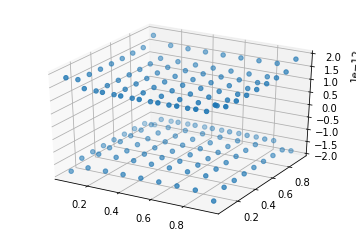

Capacitance of parallel plates
1.09546839895e-10
Difference
2.10468398945e-11


In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import integrate
from numpy.linalg import inv
from mpl_toolkits.mplot3d import Axes3D
#Upper plate at +0.5 volts
#Lower plate at -0.5 volts
b=1   #square plate of side 1m
n=10 #Discretization order
a=b/(n-1)
k1=4*3.14159265*8.85e-12
d=0.1  #distance between plates = 1milimetre
x=[]
y=[]
m=[]                 #m holds positions of charges
p=[]
xx=[]
yy=[]
for i in range(0,n-1):
    x.append(((2*i+1)*a)/2)
    y.append(((2*i+1)*a)/2)
    
for i in range(0,n-1):
    x.append(((2*i+1)*a)/2)
    y.append(((2*i+1)*a)/2)
    
for i in range(0,n-1):
    for j in range(0,n-1):
        m.append([x[i],y[j]])

for i in range(0,n-1):
    for j in range(0,n-1):
        m.append([x[i+n-1],y[j+n-1]])

#print(m)

v=[]
for i in range(0,2*((n-1)**2)):
    f1=lambda y,x:1/np.sqrt((x-m[i][0])**2+(y-m[i][1])**2)
    f2=lambda y,x:1/np.sqrt((x-m[i][0])**2+(y-m[i][1])**2+d**2)
    for k in range(0,2*((n-1)**2)):
        if(k!=i and k<(n-1)**2 and i<(n-1)**2):
            c=integrate.dblquad(f1,m[k][0]-(a/2),m[k][0]+(a/2),lambda x:m[k][1]-(a/2),lambda x:m[k][1]+(a/2))
            v.append(c[0])
        if(k==i and k<(n-1)**2 and i<(n-1)**2):
            v.append(4*a*np.log(1+np.sqrt(2)))
        if(k>=(n-1)**2 and i<(n-1)**2):
            c=integrate.dblquad(f2,m[k][0]-(a/2),m[k][0]+(a/2),lambda x:m[k][1]-(a/2),lambda x:m[k][1]+(a/2))
            v.append(c[0])
        if(i>=(n-1)**2 and k<(n-1)**2):
            c=integrate.dblquad(f2,m[k][0]-(a/2),m[k][0]+(a/2),lambda x:m[k][1]-(a/2),lambda x:m[k][1]+(a/2))
            v.append(c[0])
        if(i>=(n-1)**2 and k>=(n-1)**2 and k!=i):
            c=integrate.dblquad(f1,m[k][0]-(a/2),m[k][0]+(a/2),lambda x:m[k][1]-(a/2),lambda x:m[k][1]+(a/2))
            v.append(c[0])
        if(i>=(n-1)**2 and k>=(n-1)**2 and k==i):
            v.append(4*a*np.log(1+np.sqrt(2)))
        
#print(v)
z=np.empty(2*((n-1)**2))
z.fill(k1/2)
for h in range(((n-1)**2),2*((n-1)**2)):
    z[h]=-k1/2
#print(z)
v1=np.reshape(v,(-1,2*((n-1)**2)))
#print(v1)
vinv=inv(v1)
#print(vinv)
sigma=np.matmul(vinv,z)
#print("Charge densities")
#print(sigma)
#print("Charges on each square")
#print(sigma*a*a)
res=sigma*a*a
res2=[]
x2=[]
y2=[]
for i in range(0,2*((n-1)**2)):
    res2.append(res[i])
for i in range(0,2*((n-1)**2)):
    x2.append(m[i][0])
    y2.append(m[i][1])
for i in range(0,(n-1)**2):
    xx.append(m[i][0])
    yy.append(m[i][1])
#print(x2)
#print(y2)
print(res2)                              #res2 holds charges
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x2,y2,res2)
plt.show()
print("Capacitance of parallel plates")
C=0
for i in range(0,(n-1)**2):
    C=C+res2[i]
print(C)
print("Difference")
print(C-(8.85e-12)/d)

[4.8962505528264246e-12, 4.7759070058172958e-12, 4.7597792348404937e-12, 4.7534577111441533e-12, 4.7503617531856488e-12, 4.7487670846461648e-12, 4.7480743961024531e-12, 4.7480743961024345e-12, 4.7487670846461511e-12, 4.7503617531856407e-12, 4.7534577111441735e-12, 4.7597792348405244e-12, 4.7759070058173232e-12, 4.8962505528264521e-12, 4.7759070058172966e-12, 4.63285889876709e-12, 4.6125112411768081e-12, 4.604807845357652e-12, 4.6011397962369844e-12, 4.5992856999663532e-12, 4.5984888187925247e-12, 4.5984888187925094e-12, 4.5992856999663282e-12, 4.6011397962369625e-12, 4.6048078453576673e-12, 4.6125112411768259e-12, 4.6328588987671231e-12, 4.7759070058173095e-12, 4.7597792348404977e-12, 4.6125112411767976e-12, 4.5900374673279954e-12, 4.5813489104959763e-12, 4.5771996369589913e-12, 4.5751075662983266e-12, 4.5742108437898917e-12, 4.5742108437898828e-12, 4.5751075662983097e-12, 4.5771996369589784e-12, 4.5813489104959965e-12, 4.5900374673280196e-12, 4.6125112411768235e-12, 4.7597792348405066

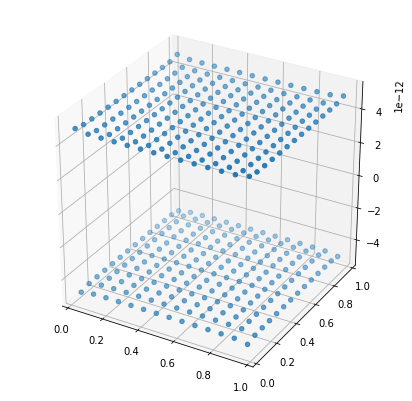

Capacitance of parallel plates
9.07350489862e-10
Difference
2.23504898615e-11


In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import integrate
from numpy.linalg import inv
from mpl_toolkits.mplot3d import Axes3D
#Upper plate at +0.5 volts
#Lower plate at -0.5 volts
b=1   #square plate of side 1m
n=15 #Discretization order
a=b/(n-1)
k1=4*3.14159265*8.85e-12
d=0.01 #distance between plates = 1milimetre
x=[]
y=[]
m=[]                 #m holds positions of charges
p=[]
xx=[]
yy=[]
for i in range(0,n-1):
    x.append(((2*i+1)*a)/2)
    y.append(((2*i+1)*a)/2)
    
for i in range(0,n-1):
    x.append(((2*i+1)*a)/2)
    y.append(((2*i+1)*a)/2)
    
for i in range(0,n-1):
    for j in range(0,n-1):
        m.append([x[i],y[j]])

for i in range(0,n-1):
    for j in range(0,n-1):
        m.append([x[i+n-1],y[j+n-1]])

#print(m)

v=[]
for i in range(0,2*((n-1)**2)):
    f1=lambda y,x:1/np.sqrt((x-m[i][0])**2+(y-m[i][1])**2)
    f2=lambda y,x:1/np.sqrt((x-m[i][0])**2+(y-m[i][1])**2+d**2)
    for k in range(0,2*((n-1)**2)):
        if(k!=i and k<(n-1)**2 and i<(n-1)**2):
            c=integrate.dblquad(f1,m[k][0]-(a/2),m[k][0]+(a/2),lambda x:m[k][1]-(a/2),lambda x:m[k][1]+(a/2))
            v.append(c[0])
        if(k==i and k<(n-1)**2 and i<(n-1)**2):
            v.append(4*a*np.log(1+np.sqrt(2)))
        if(k>=(n-1)**2 and i<(n-1)**2):
            c=integrate.dblquad(f2,m[k][0]-(a/2),m[k][0]+(a/2),lambda x:m[k][1]-(a/2),lambda x:m[k][1]+(a/2))
            v.append(c[0])
        if(i>=(n-1)**2 and k<(n-1)**2):
            c=integrate.dblquad(f2,m[k][0]-(a/2),m[k][0]+(a/2),lambda x:m[k][1]-(a/2),lambda x:m[k][1]+(a/2))
            v.append(c[0])
        if(i>=(n-1)**2 and k>=(n-1)**2 and k!=i):
            c=integrate.dblquad(f1,m[k][0]-(a/2),m[k][0]+(a/2),lambda x:m[k][1]-(a/2),lambda x:m[k][1]+(a/2))
            v.append(c[0])
        if(i>=(n-1)**2 and k>=(n-1)**2 and k==i):
            v.append(4*a*np.log(1+np.sqrt(2)))
        
#print(v)
z=np.empty(2*((n-1)**2))
z.fill(k1/2)
for h in range(((n-1)**2),2*((n-1)**2)):
    z[h]=-k1/2
#print(z)
v1=np.reshape(v,(-1,2*((n-1)**2)))
#print(v1)
vinv=inv(v1)
#print(vinv)
sigma=np.matmul(vinv,z)
#print("Charge densities")
#print(sigma)
#print("Charges on each square")
#print(sigma*a*a)
res=sigma*a*a
res2=[]
x2=[]
y2=[]
for i in range(0,2*((n-1)**2)):
    res2.append(res[i])
for i in range(0,2*((n-1)**2)):
    x2.append(m[i][0])
    y2.append(m[i][1])
for i in range(0,(n-1)**2):
    xx.append(m[i][0])
    yy.append(m[i][1])
#print(x2)
#print(y2)
print(res2)                              #res2 holds charges
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x2,y2,res2)
plt.show()
print("Capacitance of parallel plates")
C=0
for i in range(0,(n-1)**2):
    C=C+res2[i]
print(C)
print("Difference")
print(C-(8.85e-12)/d)
